## Business Understanding

Pada analisa media sosial ini saya memilih topik 'Klitih' yang beberapa hari yang lalu sempat viral dikarenakan terdapat seorang anak DPRD yang meninggal oleh pelaku klitih pada saat mencari makan sahur. Saya ingin mengetahui bagaimana sentimen netizen terhadap fenomena klitih ini dengan metode sentiment analysis.

## Data Collection

Data yang diambil adalah data dari tweet search dengan kata kunci "klitih" serta berita dari Detik.com selama 4 hari, dari 4 April 2022 hingga 8 April 2022.

#### Scrapping tweet

In [1]:
#library & package. 

import pandas as pd, numpy as np, matplotlib.pyplot as plt,  seaborn as sns
import json, tweepy, requests, re, string

from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
import nltk

In [2]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [3]:
# api v1

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Mengambil twit dengan kata kunci "klitih"  dalam bahasa Indonesia

In [4]:
query = "klitih -filter:retweets lang:id"

response = tweepy.Cursor(api.search_tweets,
              q=query,
              lang="id",
              result_type = 'mixed',
              tweet_mode = 'extended').items(2000)

In [5]:
tweet = []
time = []

for i in response:
    tweet.append(i.full_text)
    time.append(i.created_at)

df_tweet = pd.DataFrame({'date':time, 'tweet': tweet})

Mengambil tweet dari tanggal 4 April 2022 hingga 8 April 2022

In [6]:
df_tweet_date = df_tweet[(df_tweet['date'] > '2022-04-04') & (df_tweet['date'] < '2022-04-08')]
df_tweet_date

,date,tweet
0,2022-04-05 04:51:24+00:00,nDoro Sultan waktu itu (Januari 2022) ngendika...
1,2022-04-05 01:32:07+00:00,Klitih merembet sampai Semarang. Nggak ditinda...
2,2022-04-07 19:32:10+00:00,23.08\nklitih mlebu Badran \n@nizarramadhan_ \...
15,2022-04-05 01:31:59+00:00,Orang klitih pemikirannya gimana sih? Tujuanny...
16,2022-04-05 01:31:52+00:00,@AldilaSandra Lah trus manfaate Mul Kenthit ne...
...,...,...
1995,2022-04-04 14:15:52+00:00,Miris melihat kejadian ini terulang lagi untuk...
1996,2022-04-04 14:15:43+00:00,@reinhartabner Manut koe cuk kan kamu orang si...
1997,2022-04-04 14:15:30+00:00,@merapi_uncover Yo hukuman kudu dibrangus iku ...
1998,2022-04-04 14:15:23+00:00,"Pantes waktu di jogja kaga bole keluar mlem, j..."


Menyimpan hasil scrapping tweet ke dalam bentuk csv

In [7]:
df_tweet_date.to_csv('tweet_klitih.csv')

#### Scrapping Website detik.com

In [8]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request
import pandas as pd

Mengambil berita dengan keyword "klitih" dari tanggal 4 April 2022 hingga 8 April 2022

In [9]:
keyword = 'klitih'
from_date = '04/04/2022'
to_date = '08/04/2022'

url = 'https://www.detik.com/search/searchall?query='+str(keyword)+'&siteid=2&sortby=time&sorttime=2&fromdatex='+str(from_date)+'&todatex='+str(to_date)+'&page='

Mengambil Judul Berita dari halaman 1 hingga 3

In [10]:
judul_berita = []

for page in range(1,4):
    data_request = Request(url= url+str(page))
    response = urlopen(data_request)

    soup = bs(response, 'html.parser')

    berita = soup.find('div', {'class':'list media_rows list-berita'})
    judul = berita.find_all('h2', {'class':'title'})

    for i in judul:
        list_judul = i.get_text().rstrip()
        judul_berita.append(list_judul)

In [11]:
hasil_dict = {'title' : judul_berita}

In [12]:
df_judul_berita = pd.DataFrame(data=hasil_dict, columns=['title'])
df_judul_berita

,title
0,"Heboh Video Senjata Gir Dikaitkan Klithih, Adm..."
1,"Cegah Tawuran-Balap Liar, JJLS Bantul Ditutup ..."
2,"Pamer Sajam di Status WA, 4 Pemuda Kulon Progo..."
3,"Cegah Klithih di Solo, Gibran Colek Kapolres: ..."
4,"Klithih Marak di Jogja, Sultan HB X: Saya Ingi..."
5,"Pemuda di Jogja Ramai-ramai Ditelanjangi, Poli..."
6,"Nongkrong Bawa Gir Modifikasi, 4 Pelajar di Ba..."
7,Ketemu Klithih di Jogja Monggo Kontak Nomor In...
8,"Diduga Klithih Gegara Bawa Sabit, Pemuda di Jo..."
9,Jalan Berlumpur 8 km Dilalui Warga Pikul Jenaz...


Menyimpan hasil scrapping website detik.com ke dalam bentuk csv

In [13]:
df_judul_berita.to_csv('news_klitih.csv')

## Data Preparation

Pada tahap ini dilakukan text-prepocessing sehingga didapatkan data yang lebih clean untuk data processing

In [14]:
df1 = pd.read_csv('tweet_klitih.csv')
df1

,Unnamed: 0,date,tweet
0,0,2022-04-05 04:51:24+00:00,nDoro Sultan waktu itu (Januari 2022) ngendika...
1,1,2022-04-05 01:32:07+00:00,Klitih merembet sampai Semarang. Nggak ditinda...
2,2,2022-04-07 19:32:10+00:00,23.08\nklitih mlebu Badran \n@nizarramadhan_ \...
3,15,2022-04-05 01:31:59+00:00,Orang klitih pemikirannya gimana sih? Tujuanny...
4,16,2022-04-05 01:31:52+00:00,@AldilaSandra Lah trus manfaate Mul Kenthit ne...
...,...,...,...
1983,1995,2022-04-04 14:15:52+00:00,Miris melihat kejadian ini terulang lagi untuk...
1984,1996,2022-04-04 14:15:43+00:00,@reinhartabner Manut koe cuk kan kamu orang si...
1985,1997,2022-04-04 14:15:30+00:00,@merapi_uncover Yo hukuman kudu dibrangus iku ...
1986,1998,2022-04-04 14:15:23+00:00,"Pantes waktu di jogja kaga bole keluar mlem, j..."


In [15]:
df2 = pd.read_csv('news_klitih.csv')
df2

,Unnamed: 0,title
0,0,"Heboh Video Senjata Gir Dikaitkan Klithih, Adm..."
1,1,"Cegah Tawuran-Balap Liar, JJLS Bantul Ditutup ..."
2,2,"Pamer Sajam di Status WA, 4 Pemuda Kulon Progo..."
3,3,"Cegah Klithih di Solo, Gibran Colek Kapolres: ..."
4,4,"Klithih Marak di Jogja, Sultan HB X: Saya Ingi..."
5,5,"Pemuda di Jogja Ramai-ramai Ditelanjangi, Poli..."
6,6,"Nongkrong Bawa Gir Modifikasi, 4 Pelajar di Ba..."
7,7,Ketemu Klithih di Jogja Monggo Kontak Nomor In...
8,8,"Diduga Klithih Gegara Bawa Sabit, Pemuda di Jo..."
9,9,Jalan Berlumpur 8 km Dilalui Warga Pikul Jenaz...


Menggabungkan data twit klitih dengan berita klitih

In [16]:
raw_data = []

for i in df1['tweet']:
    raw_data.append(i)

for j in df2['title']:
    raw_data.append(j)

In [17]:
df = pd.DataFrame(data= raw_data, columns=['raw data'])
df

,raw data
0,nDoro Sultan waktu itu (Januari 2022) ngendika...
1,Klitih merembet sampai Semarang. Nggak ditinda...
2,23.08\nklitih mlebu Badran \n@nizarramadhan_ \...
3,Orang klitih pemikirannya gimana sih? Tujuanny...
4,@AldilaSandra Lah trus manfaate Mul Kenthit ne...
...,...
2010,Melihat Lebih Dekat TKP Klithih di Jogja yang ...
2011,"Anak Anggota DPRD Tewas Korban Klithih, Disdik..."
2012,Detik-detik Anak Anggota DPRD Kebumen Korban K...
2013,Polisi Ungkap Pemicu Anak Anggota DPRD Tewas J...


Melakukan pembersihan data dengan casefolding, tokenizing, filtering, serta stemming data sehingga menjadi clean data

In [18]:
# casefolding
def case_folding(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = text.rstrip().lstrip()
    text = text.replace('   ',' ')

    return text

# tokenizing
def tokenizing(text:str):
    text_tokens = word_tokenize(text)
    return(text_tokens)

# filtering (Menghilangkan stopwords)
def remove_stopwords(text:str):
    stopwords_engine = StopWordRemoverFactory()
    stopwords = stopwords_engine.get_stop_words()
    more_stopwords = ['udah','kalo','yg','ga','aja','rt','gak','biar','klo','tdk',
                    'merapiuncover','sih','amsaputro','nek','areajulid','yo','tp',
                    'gitu','tau','mas','bgt','si','txtdrstorywa','sampe','collegemenfess'] # menambahkan stopwords
    kata_baku = ['pelaku']

    result = []
    for word in text:
        if word not in stopwords + more_stopwords:
            result.append(word)
    return result 
    
# stemming
def stemming(text:str):
    engine = StemmerFactory()
    stemmer = engine.create_stemmer()
    text = stemmer.stem(text)

    return text

In [19]:
output=[]

for text in df['raw data']:
    text = case_folding(text)
    text = tokenizing(text)
    text = remove_stopwords(text)
    text = stemming(' '.join(text))
    output.append(text)

In [20]:
df_clean = pd.DataFrame(data=output, columns=['clean data'])
df_clean.head()

,clean data
0,ndoro sultan waktu januari ngendika klitih dib...
1,klitih rembet semarang nggak tindak cepat bisa...
2,klitih mlebu badran nizarramadhan httpstcoxfgs...
3,klitih pikir gimana tuju puasa gws moga sadar ...
4,aldilasandra trus manfaate mul kenthit neng yu...


In [21]:
new_df = df
new_df['clean data'] = df_clean
new_df

,raw data,clean data
0,nDoro Sultan waktu itu (Januari 2022) ngendika...,ndoro sultan waktu januari ngendika klitih dib...
1,Klitih merembet sampai Semarang. Nggak ditinda...,klitih rembet semarang nggak tindak cepat bisa...
2,23.08\nklitih mlebu Badran \n@nizarramadhan_ \...,klitih mlebu badran nizarramadhan httpstcoxfgs...
3,Orang klitih pemikirannya gimana sih? Tujuanny...,klitih pikir gimana tuju puasa gws moga sadar ...
4,@AldilaSandra Lah trus manfaate Mul Kenthit ne...,aldilasandra trus manfaate mul kenthit neng yu...
...,...,...
2010,Melihat Lebih Dekat TKP Klithih di Jogja yang ...,tkp klithih jogja tewas anak anggota dprd
2011,"Anak Anggota DPRD Tewas Korban Klithih, Disdik...",anak anggota dprd tewas korban klithih disdikp...
2012,Detik-detik Anak Anggota DPRD Kebumen Korban K...,detikdetik anak anggota dprd kebumen korban kl...
2013,Polisi Ungkap Pemicu Anak Anggota DPRD Tewas J...,polisi picu anak anggota dprd tewas korban kli...


## Data Processing

Pada data processing ini dilakukan proses topic modeling untuk mendapatkan topik berdasarkan pola dari data yang dimiliki

Distribusi Frekuensi Jumlah Karakter per tweet

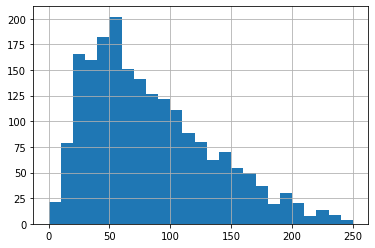

In [22]:
bin_range = np.arange(0, 260, 10)
df_clean['clean data'].str.len().hist(bins=bin_range)
plt.show()

Distribusi Frekuensi Jumlah Kata per tweet

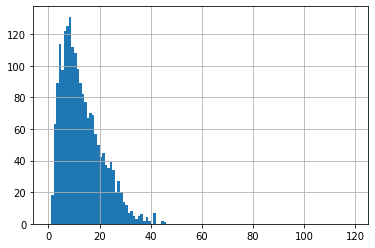

In [23]:
bin_range = np.arange(0, 120)
df_clean['clean data'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

Distribusi Frekuensi Panjang Kata Rata-Rata Pada tweet

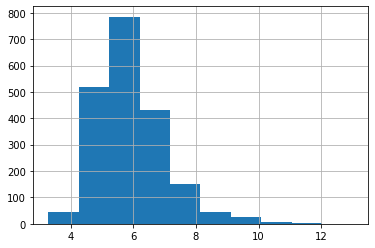

In [24]:
df_clean['clean data'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

Distribusi kata yang sering muncul

In [25]:
# Pertama kita lakukan tokenization pada dataset kita

new_clean = df_clean['clean data'].apply(lambda x: word_tokenize(str(x)))

In [26]:
# masukkan pada semua token tersebut pada satu list yang sama

list_word = [word for data in new_clean for word in data]

In [27]:
fqdist = FreqDist(list_word)
print(fqdist)

<FreqDist with 6666 samples and 25279 outcomes>


In [28]:
# Untuk mengetahui kata dan jumlah dari masing-masing kata

most_common_word = fqdist.most_common(20)
print(most_common_word)

[('klitih', 2169), ('jogja', 468), ('korban', 230), ('laku', 216), ('anak', 194), ('hukum', 127), ('polisi', 98), ('upiljaran', 86), ('jalan', 84), ('tuh', 83), ('takut', 80), ('umur', 80), ('banget', 79), ('begal', 78), ('ki', 77), ('ra', 74), ('tindak', 69), ('jam', 68), ('tinggal', 66), ('aman', 66)]


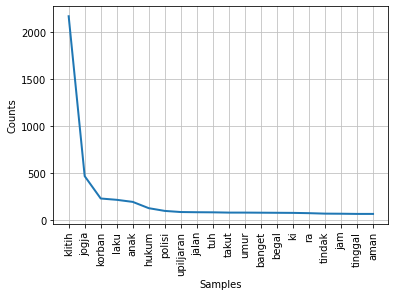

In [29]:
# Visualisasi

fqdist.plot(20,cumulative=False)
plt.show()  

Pada hasil text modeling tersebut didapatkan beberapa kata kunci yang muncul terkait dengan klitih seperti kata kunci jogja, pelaku, anak, korban, istilah, polisi, hapus dsb. Hal ini pun mengindikasikan bahwa isu klitih sedang ramai dibicarakan di daerah Jogja dan tindakan polisi yang menghapus istilah klitih itu sendiri.

Distribusi N-Gram

In [30]:
result = pd.Series(nltk.ngrams(list_word, 2)).value_counts()[:20]
print(result)

(laku, klitih)        111
(klitih, jogja)        72
(korban, klitih)       65
(klitih, klitih)       52
(klitih, tuh)          46
(klitih, ki)           43
(bawah, umur)          37
(berita, klitih)       31
(anggota, dprd)        30
(klitih, tu)           29
(anak, anggota)        29
(darurat, klitih)      28
(jogja, klitih)        27
(dprd, kebumen)        24
(takut, klitih)        21
(jogja, darurat)       19
(langit, lepas)        19
(tag, klitih)          19
(lepas, wardah)        18
(wardah, lemonilo)     18
dtype: int64


Dengan analisa distribusi N-Gram didapatkan dua topik yang saling berkaitan yang sering muncul. Hasilnya yaitu pasangan laku (yang merupakan dari kata dasar pelaku) dan klitih menunjukkan topik yang paling sering muncul, kemudian ada istilah dan klitih yang menunjukkan istilah klitih yang dihapus oleh polisi dan pemda Yogyakarta untuk menghapus fenomena klitih itu sendiri

### Sentiment Analysis

Pada proses ini saya juga membuat melakukan pemrosesan data dengan menggunakan sentiment analysis untuk mengetahui sentiment netizen terkait isu klitih ini di media sosial

Membuka file yang berisikan list kata positif dan kata negatif

In [31]:
with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
  
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

Melakukan sentiment analysis tiap data dan membaginya kedalam 3 kategori yaitu sentiment positif, negatif, serta netral

In [32]:
hasil = []

for tweet in new_df['clean data']:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
    
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")

korban
curiga
positif: 0
negatif: 3
-----------------------------------------------------
cepat
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
sadar
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
adil
hantam
hilang
positif: 1
negatif: 2
-----------------------------------------------------
susah
positif: 0
negatif: 1
-----------------------------------------------------
final
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
istimewa
rawan
positif: 1
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
takut
positif: 0
negatif: 1
-----------------------------------------------------
positif: 0

In [33]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]

Menghitung masing-masing jumlah sentimen negatif, positif, serta netral dari data yang telah diproses

In [34]:
netral = []
positif = []
negatif = []

for i in sentiments:
    if i == 'netral':
        netral.append(i)
    elif i == 'positif':
        positif.append(i)
    else:
        negatif.append(i)

print('jumlah sentiment netral :', len(netral))
print('jumlah sentiment positif :', len(positif))
print('jumlah sentiment negatif :', len(negatif))

print('jumlah total :', len(netral)+len(positif)+len(negatif))

jumlah sentiment netral : 970
jumlah sentiment positif : 306
jumlah sentiment negatif : 739
jumlah total : 2015


Menambahkan hasil sentiment dari ke dalam data awal sehingga diketahui bagaimana sentiment masing-masing data tersebut

In [35]:
new_data_df = new_df
new_data_df["sentiment"] = sentiments
new_data_df

,raw data,clean data,sentiment
0,nDoro Sultan waktu itu (Januari 2022) ngendika...,ndoro sultan waktu januari ngendika klitih dib...,negatif
1,Klitih merembet sampai Semarang. Nggak ditinda...,klitih rembet semarang nggak tindak cepat bisa...,positif
2,23.08\nklitih mlebu Badran \n@nizarramadhan_ \...,klitih mlebu badran nizarramadhan httpstcoxfgs...,netral
3,Orang klitih pemikirannya gimana sih? Tujuanny...,klitih pikir gimana tuju puasa gws moga sadar ...,positif
4,@AldilaSandra Lah trus manfaate Mul Kenthit ne...,aldilasandra trus manfaate mul kenthit neng yu...,netral
...,...,...,...
2010,Melihat Lebih Dekat TKP Klithih di Jogja yang ...,tkp klithih jogja tewas anak anggota dprd,negatif
2011,"Anak Anggota DPRD Tewas Korban Klithih, Disdik...",anak anggota dprd tewas korban klithih disdikp...,negatif
2012,Detik-detik Anak Anggota DPRD Kebumen Korban K...,detikdetik anak anggota dprd kebumen korban kl...,negatif
2013,Polisi Ungkap Pemicu Anak Anggota DPRD Tewas J...,polisi picu anak anggota dprd tewas korban kli...,negatif


### Share Insight (Visualisasi)

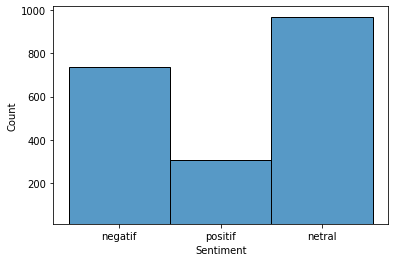

In [36]:
sns.histplot(data = sentiments)
plt.ylim(10)
plt.xlabel('Sentiment')
plt.show()

In [37]:
l1 = len(netral)
l2 = len(negatif)
l3 = len(positif)

mylabels = ["netral", "negatif", "positif"]

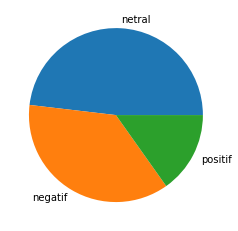

In [38]:
plt.pie([l1,l2,l3], labels=mylabels)
plt.show()

## Analysis

Dari proses analisa sentimen, lalu dibuat visualisasi dalam bentuk histogram dan piechart. Hasilnya dapat dilihat bahwa sentiment netral menjadi yang paling tinggi yang mana selisihnya cukup tipis dengan sentimen negatif, sementara sentimen positif menjadi sentiment terendah. 

Namun apabila kita membandingkan hasil sentiment negatif dan sentiment positif, didapatkan sentiment negatif yang jauh lebih banyak dari sentiment positif sehingga membuktikan bahwa sentiment masyarakat terhadap fenomena klitih ini cenderung negatif